# Final 3: Exploratory Analysis
Julian Himes  
March 2017

### Problem Statement
People are sometimes late paying back their loans. Why is that?

### Hypothesis
Unplanned expenses are harder to budget for, and people taking out urgent loans are more likely to have trouble paying them back on time.

In this dataset, indications of urgency will be gleaned from the open text field where borrowers describe why they need a loan, as well as various categories that are assumed to be generally more unexpected/urgent (e.g. medical).

The expectation is that the is_urgent indicators are positively correlated with is_late indicators.

In [2]:
# imports

import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

In [3]:
# load data 

# loans = pd.read_csv('loan_sample.csv') # sample data in hw repo (1000 of 887,379 records)
loans = pd.read_csv('../assets/loan.csv', low_memory=False)

loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# check columns and datatypes

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [5]:
# check number of records

len(loans)

887379

In [6]:
# to make the is_urgent function I kept adding words to flag until I reached ~2% of the dataset,
# counting only records with descriptions

def is_urgent(text_in):
    try:
        if ('unexpected' in str(text_in).lower()) or ('urgent' in str(text_in).lower()) \
        or ('desperate' in str(text_in).lower()) or ('unplanned' in str(text_in).lower()) \
        or ('immediate' in str(text_in).lower()) or ('emergency' in str(text_in).lower()):
            return 1
        else:
            return 0
    except: 
        return 0
    
loans['is_urgent'] = loans['desc'].map(is_urgent)
1.0 * loans.is_urgent.sum() / loans.desc.notnull().sum()

0.022375802394686936

In [7]:
# to make the is_late flag I combine various non-current loan status categories

def is_late(text_in):
    try:
        if ('Default' in str(text_in)) or ('Charged Off' in str(text_in)) or \
        ('Late (31-120 days)' in str(text_in)) or ('Late (16-30 days)' in str(text_in)):
            return 1
        else:
            return 0
    except: 
        return 0

loans['is_late'] = loans['loan_status'].map(is_late)
loans.is_late.sum()

61176

In [8]:
# check for missing data

loans.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51457
emp_length                          0
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761350
purpose                             0
title                             151
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [9]:
# clean data
# drop records missing a description

loans_cln = loans.dropna(subset=['desc'])

In [10]:
# how many records are we left with?

len(loans_cln)

126029

In [18]:
# look at an example of an 'urgent' loan

urgent_ones = loans_cln[loans_cln.is_urgent == 1].desc
urgent_ones.iloc[17]

'  Borrower added on 12/03/11 > Hello Lender!  I am a very reliable person who needs a little finanicial assistance to take care of an immediate obligation.  I appreciate any assistance you can provide.<br>'

In [11]:
# check correlation between is_late and is_urgent flags

loans_cln.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,is_urgent,is_late
id,1.000000,0.986658,0.139387,0.148375,0.173750,0.101392,0.146451,0.047404,0.130520,0.092008,...,NaN,NaN,NaN,NaN,0.001618,NaN,NaN,NaN,-0.047625,-0.059556
member_id,0.986658,1.000000,0.141113,0.150125,0.175920,0.099504,0.147584,0.046551,0.127293,0.089012,...,NaN,NaN,NaN,NaN,0.003558,NaN,NaN,NaN,-0.047690,-0.059928
loan_amnt,0.139387,0.141113,1.000000,0.995663,0.980642,0.241993,0.950185,0.354975,0.087615,0.013333,...,NaN,NaN,NaN,NaN,0.328406,NaN,NaN,NaN,-0.032554,0.028995
funded_amnt,0.148375,0.150125,0.995663,1.000000,0.985880,0.243886,0.956561,0.352907,0.090696,0.014391,...,NaN,NaN,NaN,NaN,0.328406,NaN,NaN,NaN,-0.033647,0.027527
funded_amnt_inv,0.173750,0.175920,0.980642,0.985880,1.000000,0.245685,0.940642,0.343843,0.101420,0.014737,...,NaN,NaN,NaN,NaN,0.328338,NaN,NaN,NaN,-0.035028,0.017371
int_rate,0.101392,0.099504,0.241993,0.243886,0.245685,1.000000,0.226054,-0.001241,0.180399,0.114970,...,NaN,NaN,NaN,NaN,-0.192377,NaN,NaN,NaN,-0.007298,0.182110
installment,0.146451,0.147584,0.950185,0.956561,0.940642,0.226054,1.000000,0.350986,0.090573,0.026869,...,NaN,NaN,NaN,NaN,0.304136,NaN,NaN,NaN,-0.034767,0.020677
annual_inc,0.047404,0.046551,0.354975,0.352907,0.343843,-0.001241,0.350986,1.000000,-0.168256,0.057664,...,NaN,NaN,NaN,NaN,0.319989,NaN,NaN,NaN,0.005197,-0.051317
dti,0.130520,0.127293,0.087615,0.090696,0.101420,0.180399,0.090573,-0.168256,1.000000,0.000307,...,NaN,NaN,NaN,NaN,0.067680,NaN,NaN,NaN,-0.020198,0.052302
delinq_2yrs,0.092008,0.089012,0.013333,0.014391,0.014737,0.114970,0.026869,0.057664,0.000307,1.000000,...,NaN,NaN,NaN,NaN,-0.040115,NaN,NaN,NaN,-0.009173,0.007310


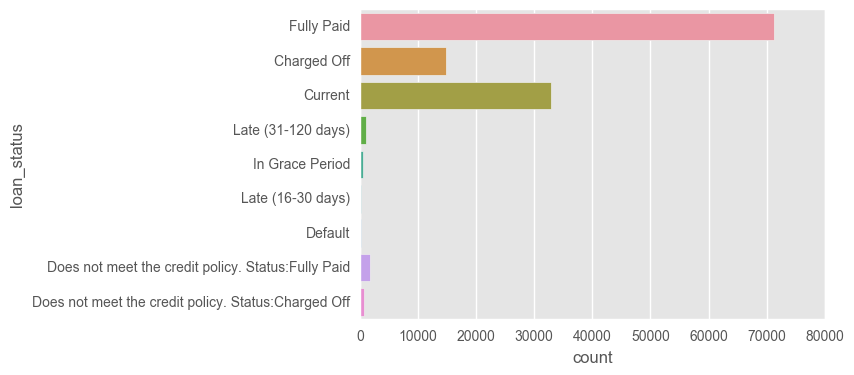

In [12]:
# check frequencies of various loan statuses (when not urgent)

sns.countplot(y='loan_status', data=loans_cln[loans_cln.is_urgent == 0]);

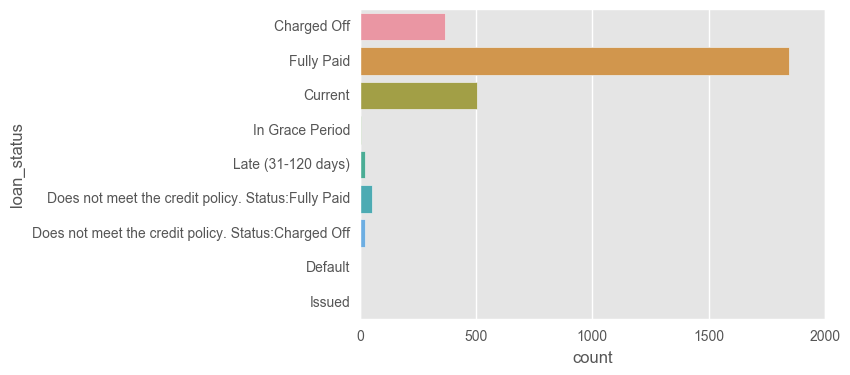

In [13]:
# check frequencies of various loan statuses (when urgent)

sns.countplot(y='loan_status', data=loans_cln[loans_cln.is_urgent == 1]);

In [17]:
# what proportion of late loans were urgent?

late_urgent = len(loans_cln[(loans_cln.is_late == 1) & (loans_cln.is_urgent == 1)])
late = len(loans_cln[loans_cln.is_late == 1])

(1.0 * late_urgent) / late

0.023773628667517106

In [18]:
# what proportion of the urgent loans were late?

urg = len(loans_cln[loans_cln.is_urgent == 1])
(1.0 * late_urgent) / urg

0.1453900709219858

In [19]:
# what proportion of non-urgent loans were late?

non_urg = len(loans_cln[loans_cln.is_urgent == 0])
non_urg_late = len(loans_cln[(loans_cln.is_late == 1) & (loans_cln.is_urgent == 0)])

(1.0 * non_urg_late) / non_urg

0.13664586190943842

### Insights
So far the 'is_urgent' flag is not providing too much explanatory power, though it does indicate a slightly higher likelihood of being late. It also has a very, very weak positive correlation with is_late.

Issues:
* The is_urgent flag is picking up some confounding data points that actually indicate careful, financially sound planning (e.g. "...I will pay this loan back immediately" or "...I want to plan for unexpected events in the future")

Next steps:

* Tune definition of is_urgent flag
* Look at loan type categories and their correlations with lateness
* Test various binary models with is_late flag as outcome
* Test various classifer models with loan status categories as outcome